### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [5]:
# main folder
path = r'C:\Users\steve\Documents\Olist Marketplace Analysis'

# merged data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_merged_cleaned_categories.pkl'))

Settings

In [7]:
# pd display settings
pd.set_option('display.max_columns', 50)

### Prep Data

In [9]:
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approved_hrs,approved_to_carrier_hrs,carrier_to_customer_hrs,purchase_to_delivered_hrs,seller_id,product_id,shipping_limit_date,order_item_id,price,freight_value,total_price,total_freight,order_total,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,custom_category
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,0.22,161.08,170.28,331.58,213b25e6f54661939f11710a6fddb871,af74cc53dcffc8384b29e7abfa41902b,2018-05-02 22:15:09,1,79.80,19.53,79.80,19.53,99.33,casa_construcao,home_construction,57.0,921.0,8.0,800.0,17.0,27.0,17.0,13321,salto,SP,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,Construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,0.29,50.98,30.24,81.51,eaf6d55068dea77334e8477d3878d89e,a630cc320a8c872f9de830cf121661a3,2018-07-02 11:18:58,1,17.00,7.39,17.00,7.39,24.39,automotivo,auto,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,4660,sao paulo,SP,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,Auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,46.54,34.35,69.19,150.08,cc419e0650a3c5ba77189a1882b7556a,2028bf1b01cafb2d2b1901fca4083222,2017-12-26 09:52:34,1,56.99,8.72,56.99,8.72,65.71,perfumaria,perfumery,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015,santo andre,SP,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,Beauty
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,0.15,32.25,317.12,349.53,da8622b14eb17ae2831f4ac5b9dab84a,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,1,89.90,17.88,89.90,17.88,107.78,cama_mesa_banho,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405,piracicaba,SP,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,Home & Garden
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,0.15,32.25,317.12,349.53,da8622b14eb17ae2831f4ac5b9dab84a,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,1,89.90,17.88,89.90,17.88,107.78,cama_mesa_banho,bed_bath_table,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,13405,piracicaba,SP,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,Home & Garden


#### 1. Choose Columns

**Analyze What Drives Revenue** - prices, customer loyalty (return customer), number of orders, number of products offered
- Does higher prices mean more or less orders?
- Is number of orders or price a better indicator of total revenue?
- How do return customers behave - what price point do they buy, how many?
- Does increasing the number of products offered lead to more repeat customers? More revenue?

Columns to keep = order_id, seller_id, customer_id, product_id, order_item_id, product_category_name_english, price, freight_value, order_total, order_purchase_timestamp, order_delivered_customer_date, order_estimated_delivery_date, purchase_to_approved_hrs, purchase_to_delivered_hrs, product_description_length, product_photos_qty, review_score, customer_state, seller_state

In [13]:
# create subset with columns used to analysize customers
df_cust = df[['order_id', 'seller_id', 'customer_id', 'product_id', 'order_item_id', 'custom_category', 'price', 'freight_value', 'order_total', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'purchase_to_approved_hrs', 'purchase_to_delivered_hrs', 'product_description_length', 'product_photos_qty', 'review_score', 'customer_state', 'seller_state']]

In [14]:
# rename columns to make more concise or clear
df_cust.rename(columns = {'custom_category': 'product_category', 'frieght_value': 'shipping_cost',
                          'order_purchase_timestamp': 'order_purchased_time', 'order_delivered_customer_date': 'order_delivered_time',
                          'purchase_to_approve_hrs': 'approval_time_hrs', 'purchase_to_delivered_hrs': 'delivery_time_hrs'}, inplace=True)

In [15]:
df_cust.head(1)

,order_id,seller_id,customer_id,product_id,order_item_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,1,Construction,79.8,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP


In [16]:
df_cust.shape

(118307, 19)

In [17]:
# check for nulls
df_cust.isnull().sum()

order_id                            0
seller_id                           0
customer_id                         0
product_id                          0
order_item_id                       0
product_category                    0
price                               0
freight_value                       0
order_total                         0
order_purchased_time                0
order_delivered_time             2588
order_estimated_delivery_date       0
purchase_to_approved_hrs           15
delivery_time_hrs                2588
product_description_length       1709
product_photos_qty               1709
review_score                      978
customer_state                      0
seller_state                        0
dtype: int64

In [18]:
# check for full duplicates
dups = df_cust.duplicated()
dups.shape

(118307,)

#### 2. Derive Columns

**Columns to Derive:** 

**Repeat Customers:**
- **num_orders:** (int) number of orders the customer has placed
- **return_customer:** (bool) 0: customer placed only 1 order, 1: customer placed > 1 order
- **num_orders_w_seller:** (int) number of orders the customer has placed with the seller
- **return_to_seller:** (bool) 0: customer has placed only 1 order with the seller, 1: customer has placed > 1 order with the seller

**Order Details:**
- **num_items:** (int) number of items per order (aka max order_item_id), order_item_id can then be deleted
- **on_time_flag:** (str) order arrived 'on time', 'early', or 'late' (compares delivery & expected delivery dates)

**Seller Stats**:
- **num_orders_received:** (int) number of orders received by a seller
- **total_revenue:** (int) sum of the prices of product sold by a seller
- **num_products** (int) number of the unique products sold by a seller *(Note: Due to the data available, this will only reflect the number of unique products SOLD by the seller; if the selller offers more products but only sold 3 of them, it will be marked as 3)*

*Optional*
- **desciption_flag:** flags products with poor descriptions - too short, too long, or adequate
- **photo_qty_flag:** flags products with poor photo quantities - too few, too many, or adequate

**Num Orders** *(INT)* --------------------------------------------------

In [22]:
# groupby customer id and count the number of order ids for each
df_cust['num_orders'] = df_cust.groupby('customer_id')['order_id'].transform('count')
df_cust.head()

,order_id,seller_id,customer_id,product_id,order_item_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,1,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,1,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,1,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1
3,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,1,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2
4,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,1,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2


In [23]:
df_cust['num_orders'].value_counts(dropna=False)

num_orders
1     85747
2     19638
3      4668
4      3324
6      1680
5      1245
7       329
8       320
12      252
10      160
11      121
24      120
9       117
15       90
14       70
63       63
21       63
20       60
13       52
22       44
38       38
16       32
29       29
26       26
19       19
Name: count, dtype: int64

**Insight:** Majority of customers have placed only 1 order with Olist. The value counts get exponentially lower as the number of orders gets higher. The highest number of orders a customer has placed is 19; however the value counts reach below a 1,00 at 6+ orders.

**Return Customer** *(BOOL)* ----------------------------------------------

In [26]:
# create col that retuns a 0 for num_orders of 1 and returns a 1 for num_order >1
df_cust['return_customer'] = (df_cust['num_orders'] > 1).astype(int)

df_cust.head(3)

,order_id,seller_id,customer_id,product_id,order_item_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,1,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,1,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,1,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0


In [27]:
df_cust['return_customer'].value_counts(dropna=False)

return_customer
0    85747
1    32560
Name: count, dtype: int64

In [28]:
85747 / (85747 + 32560)

0.724783825132917

**Insight:** About 72% of customers are not return customers (have only placed 1 order with Olist).

**Num Orders with a Seller** *(INT)* ---------------------------------------

In [31]:
# group by customer_id and seller_id then count the order_ids 
# to get the number of times that cusomer has ordered from that seller
df_cust['num_orders_w_seller'] = df_cust.groupby(['customer_id', 'seller_id'])['order_id'].transform('count')

df_cust.head()

,order_id,seller_id,customer_id,product_id,order_item_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,1,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,1,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,1,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1
3,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,1,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2,1,2
4,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,1,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2,1,2


In [32]:
df_cust['num_orders_w_seller'].value_counts(dropna=False)

num_orders_w_seller
1     87927
2     18442
3      4275
4      3032
6      1662
5      1205
8       280
7       266
12      228
10      130
11      110
9       108
24       96
15       75
14       70
21       63
20       60
13       52
42       42
38       38
16       32
29       29
26       26
22       22
19       19
18       18
Name: count, dtype: int64

**Insight:** Majority of customers only purchase once from a particular customer - however, bare in mind, most customers are not returning customers at Olist in general.

**Return to Seller** *(BOOL)* ------------------------------------------------

In [35]:
# create col that returns a 0 for num_orders_w_seller of 1 and returns a 1 for those >1
df_cust['return_to_seller'] = (df_cust['num_orders_w_seller'] > 1).astype(int)

df_cust.head(3)

,order_id,seller_id,customer_id,product_id,order_item_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,1,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,1,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,1,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0


In [36]:
df_cust['return_to_seller'].value_counts(dropna=False)

return_to_seller
0    87927
1    30380
Name: count, dtype: int64

In [37]:
87927 / (87927 + 30380)

0.7432104609194722

**Insight:** Percent reflects that of return customers, only slighlty more with about 74% not returning to seller.

Find the distibution within return customers only:

In [40]:
# filter df for only return customers (aka where return_customer = 1)
return_cust_df = df_cust[df_cust['return_customer'] == 1]

# run value counts of return_to_seller within filtered df
return_cust_df['return_to_seller'].value_counts(dropna=False)

return_to_seller
1    30380
0     2180
Name: count, dtype: int64

In [41]:
30380 / (30380 + 2180)

0.933046683046683

**Insight:** Return customers usually reorder from a seller that they have previously ordered from, with a 93% return to seller rate.

**Num Items** *(INT)* ----------------------------------------------------

In [44]:
# group by order_id and find the max order_item id to get the number of items per order
df_cust['num_items'] = df_cust.groupby('order_id')['order_item_id'].transform('max')

df_cust.head(3)

,order_id,seller_id,customer_id,product_id,order_item_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,1,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,1,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,1,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1


In [45]:
df_cust.shape

(118307, 24)

In [46]:
# delete order_item_id 
df_cust.drop('order_item_id', axis=1, inplace=True)

df_cust.shape

(118307, 23)

In [47]:
df_cust['num_items'].value_counts(dropna=False)

num_items
1     93328
2     15842
3      4200
4      2092
6      1224
5      1035
7       168
10       80
8        64
12       60
11       55
20       40
15       30
14       28
9        27
21       21
13       13
Name: count, dtype: int64

**Insight:** Most orders contain only 1 product. The value counts exponentially decrease as the number of items per order increases. The highest number of items per order is 13; the value counts fall under 1,00 at 6+ items per order.

In [49]:
# see breakdown of items per order for return customers vs non returning
# returning:
return_cust = df_cust[df_cust['return_customer'] == 1]

return_cust['num_items'].value_counts(dropna=False)

num_items
2     15842
1      7581
3      4200
4      2092
6      1224
5      1035
7       168
10       80
8        64
12       60
11       55
20       40
15       30
14       28
9        27
21       21
13       13
Name: count, dtype: int64

**Insight:** Returning customers tend to buy more than 1 item per order, but not much more. Majority buy 2 items.

In [51]:
# not returning:
once_cust = df_cust[df_cust['return_customer'] == 0]

once_cust['num_items'].value_counts(dropna=False)

num_items
1    85747
Name: count, dtype: int64

**Insight:** All one-time customers only purchased 1 product in their order.

In [53]:
# see item counts per order for return customers that returned to the same seller
return_to_seller = return_cust[return_cust['return_to_seller'] == 1]

return_to_seller['num_items'].value_counts(dropna=False)

num_items
2     14016
1      7581
3      3946
4      2022
6      1216
5      1021
7       160
10       80
8        64
12       60
11       55
20       40
15       30
14       28
9        27
21       21
13       13
Name: count, dtype: int64

**Insight:** Customers returning to the same seller are behaving similar to all return customer - more likely to purchase more items; however majority purchasing 1 or 2.

**On Time Flag** (STR) -----------------------------------------------------

In [56]:
# convert columns to datetime
df_cust['order_estimated_delivery_date'] = pd.to_datetime(df_cust['order_estimated_delivery_date'])
df_cust['order_delivered_time'] = pd.to_datetime(df_cust['order_delivered_time'])

# match formats - add time to estimated date
df_cust['order_estimated_delivery_date'] = df_cust['order_estimated_delivery_date'].dt.normalize()

# calculate the difference of the days
df_cust['delivery_difference'] = (df_cust['order_delivered_time'] - df_cust['order_estimated_delivery_date']).dt.days

df_cust.head(3)

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0


In [57]:
df_cust.loc[df_cust['delivery_difference'] == 0, 'on_time_flag'] = 'on_time'

In [58]:
df_cust.loc[df_cust['delivery_difference'] > 0, 'on_time_flag'] = 'late'

In [59]:
df_cust.loc[df_cust['delivery_difference'] < 0, 'on_time_flag'] = 'early'

In [60]:
df_orders = df_cust.groupby('order_id')['on_time_flag'].first()
df_orders.value_counts(dropna=False)

on_time_flag
early      88649
late        6534
None        2190
on_time     1292
Name: count, dtype: int64

In [61]:
88649 / (88649 + 6534 + 2190 + 1292)

0.8984847717022247

**Insight:** A significant majority of orders (90%) were received by the customer before their expected delivery date. 

*The NaN most likely represents cancelled orders or order that were not yet received (due to timing of data pulling or seller error).*

**Number of Order Received** *(INT)* ---------------------------------------------

In [64]:
# group by seller_id and count number of order_ids
df_cust['num_orders_received'] = df_cust.groupby('seller_id')['order_id'].transform('count')

df_cust.head(3)

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0,early,200
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,3
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,1893


In [65]:
df_cust['seller_id'].nunique()

3095

In [66]:
df_seller = df_cust.groupby('seller_id')['num_orders_received'].max()
df_seller.value_counts()

num_orders_received
1       487
2       319
3       225
4       144
5       144
       ... 
348       1
230       1
2155      1
1186      1
312       1
Name: count, Length: 269, dtype: int64

**Insight:** The highest repeat value counts are low numbers(<5) possibly indicating there are many new or low performing sellers on Olist.

In [68]:
df_seller.min(), df_seller.max()

(1, 2155)

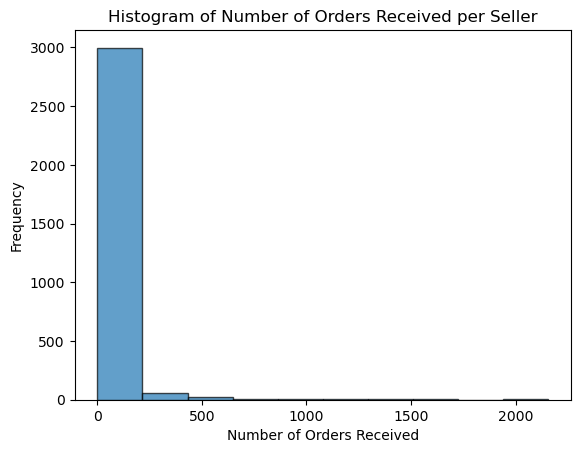

In [69]:
# visualize distribution
df_seller.plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)

plt.xlabel('Number of Orders Received')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Orders Received per Seller')

plt.show()

(0.0, 300.0)

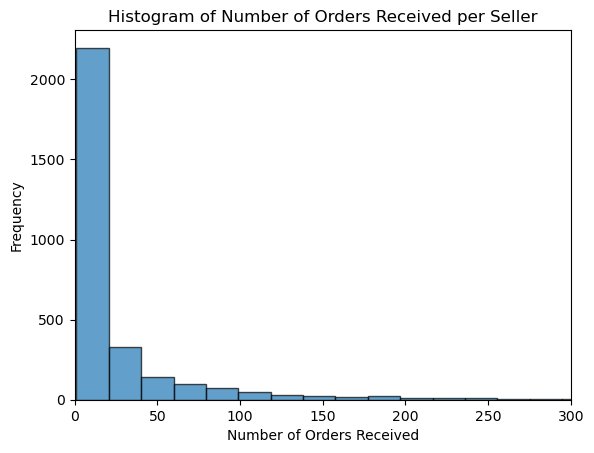

In [70]:
# zoom in plot - limiting x axis to 300 orders
df_seller.plot(kind='hist', bins=110, edgecolor='black', alpha=0.7)

plt.xlabel('Number of Orders Received')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Orders Received per Seller')

plt.xlim(0, 300)

**Insight:** Majority of sellers have less than 50 orders (for about a 2 year time period), which suggests sellers are either new without an established customer base OR their customer base is simply not using Olist as their means of purchasing. 

*Note:* Seller's could have different start dates, meaning an unkown amount of sellers could have joined within the last month of the data provided; therefore, skewing our understanding of their perfomance using the above histogram.

**Total Revenue** *(INT)* ---------------------------------------------

In [73]:
# group by seller_id and sum the prices
df_cust['total_revenue'] = df_cust.groupby('seller_id')['price'].transform('sum')

df_cust.head(3)

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received,total_revenue
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0,early,200,15989.00
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,3,51.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,1893,110821.27


**Num Products** *(INT)* ---------------------------------------------------

In [75]:
# group by seller_id and count the unique product_id for each seller
unique_product_count = df_cust.groupby('seller_id')['product_id'].nunique().reset_index()

# rename column for clarity
unique_product_count.rename(columns={'product_id': 'unq_products_sold'}, inplace=True)

# merge unique product count into df
df_cust = pd.merge(df_cust, unique_product_count, on='seller_id', how='left')

df_cust.head()

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received,total_revenue,unq_products_sold
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0,early,200,15989.00,81
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,3,51.00,2
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,1893,110821.27,37
3,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2,1,2,1,1,-14.0,early,1662,171784.57,222
4,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,5.0,MG,SP,2,1,2,1,1,-14.0,early,1662,171784.57,222


In [76]:
unique_product_count['unq_products_sold'].value_counts()

unq_products_sold
1      746
2      441
3      291
4      214
5      176
      ... 
266      1
127      1
82       1
171      1
289      1
Name: count, Length: 130, dtype: int64

In [77]:
unique_product_count['seller_id'].count()

3095

In [78]:
746 / 3095

0.24103392568659127

**Insight:** Almost a quarter of the sellers, 24%, offer (or of the products they offer, sold only) 1 product. The value counts decrease as the number of unique products sold increases.

#### New Data Frame Stats

In [81]:
df_cust.shape

(118307, 28)

In [82]:
# added 8 columns

In [83]:
df_cust.isnull().sum()

order_id                            0
seller_id                           0
customer_id                         0
product_id                          0
product_category                    0
price                               0
freight_value                       0
order_total                         0
order_purchased_time                0
order_delivered_time             2588
order_estimated_delivery_date       0
purchase_to_approved_hrs           15
delivery_time_hrs                2588
product_description_length       1709
product_photos_qty               1709
review_score                      978
customer_state                      0
seller_state                        0
num_orders                          0
return_customer                     0
num_orders_w_seller                 0
return_to_seller                    0
num_items                           0
delivery_difference              2588
on_time_flag                     2588
num_orders_received                 0
total_revenu

In [84]:
# check for full duplicates
dups = df_cust.duplicated()
dups.shape

(118307,)

### Export Data

In [86]:
df_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_data.pkl'))